## Implementing the callback functions in Tensorflow

In [2]:
import keras

In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Acessing the google drive con-tent

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
!ls

drive  sample_data


In [8]:
!pwd

/content


In [9]:
os.chdir('/content/drive/MyDrive/My_Data')

In [10]:
!pwd

/content/drive/MyDrive/My_Data


In [11]:
os.getcwd()

'/content/drive/MyDrive/My_Data'

In [12]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [13]:
## Loading the dataset

In [14]:
mnist= tf.keras.datasets.mnist

In [15]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
x_test.shape,x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [17]:
len(x_train[0][0])

28

In [18]:
x_train=x_train/255
x_test=x_test/255

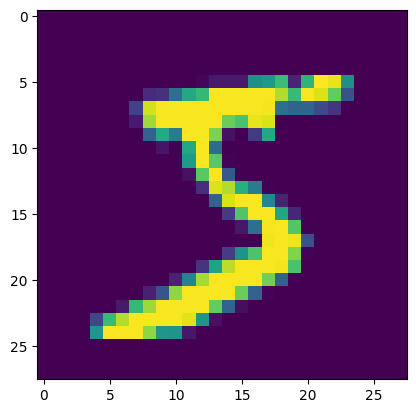

In [19]:
plt.imshow(x_train[0])

<Axes: >

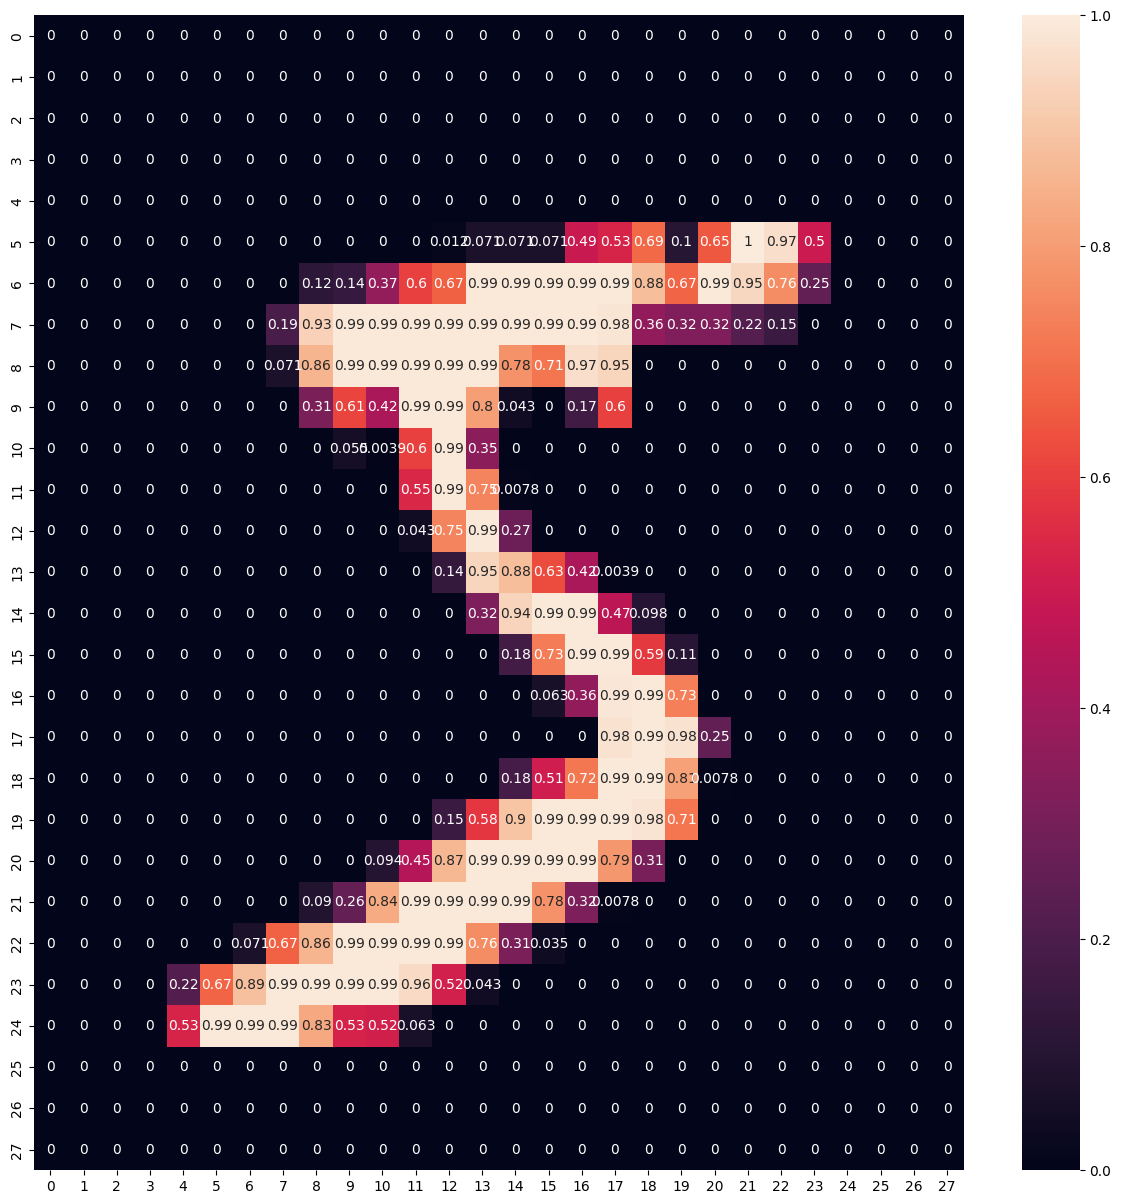

In [20]:
plt.figure(figsize= (15,15))
sns.heatmap(x_train[0],annot=True)

In [21]:
Layers = [
    tf.keras.layers.Flatten(input_shape= [28,28], name="input_layer"),
    tf.keras.layers.Dense(300,activation="relu",name="Hidden_1"),
    tf.keras.layers.Dense(100,activation="relu",name="Hidden_2"),
    tf.keras.layers.Dense(10,activation="softmax",name="output_layer")
]

In [22]:
model_clf = tf.keras.models.Sequential(Layers)

In [23]:
model_clf.layers

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_1 (Dense)            (None, 300)               235500    
                                                                 
 Hidden_2 (Dense)            (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
hidden_1= model_clf.layers[1]
hidden_1.name

'Hidden_1'

In [26]:
hidden_1.get_weights()

[array([[ 0.05310278, -0.0501215 ,  0.06347379, ...,  0.00922573,
         -0.00617396, -0.06449808],
        [ 0.02871684,  0.03881071, -0.0039155 , ...,  0.04560503,
         -0.01615369,  0.06154393],
        [ 0.00521303,  0.02091011, -0.0108562 , ...,  0.05796273,
         -0.062355  ,  0.00710685],
        ...,
        [-0.03039271, -0.0372606 ,  0.04440778, ..., -0.06140547,
          0.03530741,  0.01946254],
        [-0.01962094,  0.03528427, -0.04055556, ...,  0.00252958,
         -0.05673667, -0.01578759],
        [-0.0176773 ,  0.03799475,  0.00096641, ..., -0.07140061,
          0.02193889, -0.01423507]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
weight,bias = hidden_1.get_weights()

In [28]:
weight.shape

(784, 300)

In [29]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()

In [30]:
model_clf.compile(loss= loss_fn,
                  optimizer="SGD",
                  metrics=['accuracy']
                  )

### Tensorbord callback Function

In [31]:
import time

def get_log_path(log_dir="logs/fit"):
  file_name = time.strftime("log_%Y_%m_%d_%H_%M_%s")
  logs_path = os.path.join(log_dir,file_name)
  print("Saving the logs at ", logs_path)
  return logs_path


In [32]:
log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
# tb_cb is representing tensorbord Callback

Saving the logs at  logs/fit/log_2024_02_21_04_58_1708491534


### Early Stopping Callback
If we dont specify any parameters then by default it will monitor  the velidation loss

In [33]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

### Model CheckPoint

In [34]:
ckpt_path = "Model_ckpt.h5"
checkpointing_cb= tf.keras.callbacks.ModelCheckpoint(ckpt_path , save_best_only = True)


In [35]:
x_valid,x_train= x_train[:5000] , x_train[5000:]
y_valid,y_train = y_train[:5000] , y_train[5000:]

In [36]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
# Original Train
with tf.device('/GPU'):
  history = model_clf.fit(x_train,y_train ,epochs=30 , validation_data=(x_valid,y_valid),batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6269 - accuracy: 0.8371 - val_loss: 0.3079 - val_accuracy: 0.9182
Epoch 2/30
  51/1719 [..............................] - ETA: 5s - loss: 0.3268 - accuracy: 0.9093

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 6s 3ms/step - loss: 0.2902 - accuracy: 0.9177 - val_loss: 0.2426 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2360 - accuracy: 0.9328 - val_loss: 0.2050 - val_accuracy: 0.9412
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2010 - accuracy: 0.9426 - val_loss: 0.1797 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1753 - accuracy: 0.9499 - val_loss: 0.1599 - val_accuracy: 0.9544
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1556 - accuracy: 0.9556 - val_loss: 0.1473 - val_accuracy: 0.9582
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1393 - accuracy: 0.9612 - val_loss: 0.1343 - val_accuracy: 0.9634
Epoch 8/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1259 - accuracy: 0.9650 - val_loss: 0.1230 - val_accuracy: 0.9684
Epo

In [39]:
### CheckPoint Traning

with tf.device("/GPU"):
  ckpt_model = tf.keras.models.load_model(ckpt_path)
  history = ckpt_model.fit(x_train,y_train,epochs = 20,
                           validation_data = (x_valid,y_valid),batch_size=32,callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9932 - val_loss: 0.0685 - val_accuracy: 0.9804
Epoch 2/20
  26/1719 [..............................] - ETA: 6s - loss: 0.0265 - accuracy: 0.9940

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 8s 5ms/step - loss: 0.0277 - accuracy: 0.9938 - val_loss: 0.0713 - val_accuracy: 0.9802
Epoch 3/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0261 - accuracy: 0.9943 - val_loss: 0.0683 - val_accuracy: 0.9810
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0248 - accuracy: 0.9947 - val_loss: 0.0690 - val_accuracy: 0.9808
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0237 - accuracy: 0.9949 - val_loss: 0.0700 - val_accuracy: 0.9806
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0225 - accuracy: 0.9954 - val_loss: 0.0680 - val_accuracy: 0.9800
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0212 - accuracy: 0.9956 - val_loss: 0.0676 - val_accuracy: 0.9816
Epoch 8/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0202 - accuracy: 0.9960 - val_loss: 0.0674 - val_accuracy: 0.9810
Ep

In [42]:
### Saving the model
import time
import os

def save_model_path(model_dir = "Trained_Model"):
  os.makedirs(model_dir, exist_ok = True)
  file_name = time.strftime("log_%Y_%m_%d_%H_%M_%s")
  model_path = os.path.join(model_dir,file_name)
  print("model" , file_name , "will be saved at ", model_path)
  return model_path

In [43]:
unique_path = save_model_path()
unique_path

model log_2024_02_21_05_25_1708493159 will be saved at  Trained_Model/log_2024_02_21_05_25_1708493159


'Trained_Model/log_2024_02_21_05_25_1708493159'

In [44]:
tf.keras.models.save_model(model_clf,unique_path)

In [45]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [46]:
## history.history

In [47]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.029439,0.993182,0.068474,0.9804
1,0.027736,0.993800,0.071331,0.9802
2,0.026119,0.994327,0.068348,0.9810
3,0.024823,0.994727,0.069009,0.9808
4,0.023712,0.994855,0.069974,0.9806
5,0.022461,0.995436,0.067973,0.9800
6,0.021241,0.995636,0.067556,0.9816
7,0.020161,0.996036,0.067419,0.9810
8,0.019101,0.996618,0.067282,0.9812
9,0.018187,0.996873,0.068065,0.9816


<Axes: >

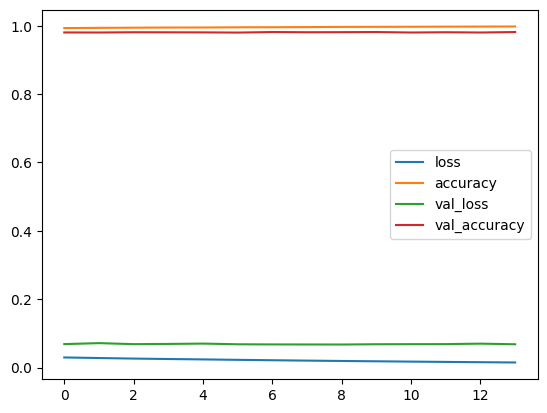

In [48]:
pd.DataFrame(history.history).plot()

In [50]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0676 - accuracy: 0.9788


[0.06760627031326294, 0.9787999987602234]

In [53]:
x_new = x_test[:3]
x_new;

In [54]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 133ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.993, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.004,
        0.   ]], dtype=float32)

In [55]:
y_prob

array([[1.2272716e-06, 1.8236460e-07, 1.0962923e-04, 1.6768226e-04,
        8.6528340e-10, 8.6076460e-07, 5.9768219e-12, 9.9967945e-01,
        1.5048884e-06, 3.9445829e-05],
       [2.9472676e-07, 1.0596239e-05, 9.9975973e-01, 2.2289758e-04,
        1.4090137e-11, 4.8165003e-07, 2.3890453e-07, 2.5706021e-10,
        5.8228406e-06, 2.5188453e-13],
       [3.3392716e-05, 9.9324143e-01, 3.1301705e-04, 2.0203907e-04,
        6.6242804e-04, 6.1477731e-05, 2.3007204e-04, 1.3725370e-03,
        3.7879217e-03, 9.5670504e-05]], dtype=float32)

In [56]:
y_pred = np.argmax(y_prob , axis= 1)
y_pred

array([7, 2, 1])

In [58]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)